# Visualisation Walkthrough 

## Introduction

This walkthrough covers an example of data visualisation using election result data that is publicly available. The final result is a geographical map that shows the colour of the winning party in each constituency.

To be able to run this notebook, you will need your file structure set up with a _data_ folder inside your working directory. _Analysis_ and _output_ folders are also recommended to keep your files tidy, but you can follow this walkthrough without. The data you will need can be found on the [Github repository](https://github.com/MangoTheCat/rss-2018-hackathon). Before starting this walkthrough **download** `ge_2010_results.csv` into your _data_ folder.

Firstly, we import all the modules we will need.


In [191]:
import geopandas as gpd
import pandas as pd

import matplotlib as plt
# Set this so we can see all columns when calling .head() on a DataFrame
pd.set_option('display.max_columns', None)

## Processing the Data


### Importing and Exploring

The next step is to import the election data that we will be using and assign it to an object. The data we are using is in `ge_2010_results.csv` which should now be in your _data_ folder. We are then going to explore the resulting dataframe so that we know what we are dealing with. 

In [192]:
results_2010 = pd.read_csv("data/ge_2010_results.csv")

In [193]:
results_2010.shape

(650, 144)

This table has 650 rows and 144 columns, so we won't be inspecting the whole table or even the top few full rows. Instead, let's look at the first 6 rows of the first 9 and last columns to get an idea of what is in the dataframe.


In [194]:
results_2010.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 143]].head(6)

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,APP,AWL,AWP,BB,BCP,Bean,Best,BGPV,BIB,BIC,Blue,BNP,BP Elvis,C28,Cam Soc,CG,Ch M,Ch P,CIP,CITY,CNPG,Comm,Comm L,Con,Cor D,CPA,CSP,CTDP,CURE,D Lab,D Nat,DDP,DUP,ED,EIP,EPA,FAWG,FDP,FFR,Grn,GSOT,Hum,ICHC,IEAC,IFED,ILEU,Impact,Ind1,Ind2,Ind3,Ind4,Ind5,IPT,ISGB,ISQM,IUK,IVH,IZB,JAC,Joy,JP,Lab,Land,LD,Lib,Libert,LIND,LLPB,LTT,MACI,MCP,MEDI,MEP,MIF,MK,MPEA,MRLP,MRP,Nat Lib,NCDV,ND,New,NF,NFP,NICF,Nobody,NSPS,PBP,PC,Pirate,PNDP,Poet,PPBF,PPE,PPNV,Reform,Respect,Rest,RRG,RTBP,SACL,Sci,SDLP,SEP,SF,SIG,SJP,SKGP,SMA,SMRA,SNP,Soc,Soc Alt,Soc Dem,Soc Lab,South,Speaker,SSP,TF,TOC,Trust,TUSC,TUV,UCUNF,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
0,1.0,Aberavon,Wales,2010.0,50838.0,30958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,558.0,0.0,0.0,0.0,0.0,0.0,1276.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4411.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,919.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16073.0,0.0,5034.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Aberconwy,Wales,2010.0,44593.0,29966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,10734.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7336.0,0.0,5786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,632.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,Aberdeen North,Scotland,2010.0,64808.0,37701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16746.0,0.0,7001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,Aberdeen South,Scotland,2010.0,64031.0,43034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8914.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15722.0,0.0,12216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Aberdeenshire West & Kincardine,Scotland,2010.0,66110.0,45195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13678.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6159.0,0.0,17362.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,397.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,Airdrie & Shotts,Scotland,2010.0,62364.0,35849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

From this we can see that the first 6 columns contain constituency information and all other columns contain the number of votes attained by each party. For simplicity, in this walkthrough we will focus on the results for Wales only, and so we need to filter the dataframe to just give us the Welsh entries.

In [195]:
wales_results_2010 = results_2010[results_2010.Region == 'Wales']

wales_results_2010.shape

(40, 144)

We can check this has worked by looking at the change in dataframe dimensions. Now, we are going to simplify the dataframe as much as possible by deleting any columns that we do not need for this evaluation - including parties with no votes in any Welsh constituencies, as well as some of the general information columns.

In [196]:
# Remove useless columns
discard_cols = ['Press Association Reference', 'Election Year', 'Electorate', 'Votes']
wales_results_2010 = wales_results_2010.drop(columns = discard_cols)

# Remove irrelevant parties
parties = set(wales_results_2010.columns) - set(['Region', 'Press Association Reference'])
parties = list(parties)
wales_results_2010 = wales_results_2010.loc[:, (wales_results_2010 != 0).any(axis=0)]

wales_results_2010.head(3)

,Constituency Name,Region,AGS,Bean,BGPV,BNP,Ch P,Comm,Con,Grn,Ind1,Ind2,Lab,LD,MRLP,NF,PC,Soc Lab,TUSC,UKIP
0,Aberavon,Wales,0.0,558.0,0.0,1276.0,0.0,0.0,4411.0,0.0,919.0,0.0,16073.0,5034.0,0.0,0.0,2198.0,0.0,0.0,489.0
1,Aberconwy,Wales,0.0,0.0,0.0,0.0,137.0,0.0,10734.0,0.0,0.0,0.0,7336.0,5786.0,0.0,0.0,5341.0,0.0,0.0,632.0
9,Alyn & Deeside,Wales,0.0,0.0,0.0,1368.0,0.0,0.0,12885.0,0.0,0.0,0.0,15804.0,7308.0,0.0,0.0,1549.0,0.0,0.0,1009.0


Now we have a much more manageable dataframe.

### Finding the Winning Party

Next, we need to work out which party won in each constituency, which is done by finding the name of the column with the highest number of votes in each row. Here, a vector of the winning party names is created, then added as an extra column to our simplified Wales dataframe.

In [197]:
winners = wales_results_2010.iloc[:,2:].idxmax(axis = 1)
wales_results_2010['Winning'] = winners

wales_results_2010.head(10)

,Constituency Name,Region,AGS,Bean,BGPV,BNP,Ch P,Comm,Con,Grn,Ind1,Ind2,Lab,LD,MRLP,NF,PC,Soc Lab,TUSC,UKIP,Winning
0,Aberavon,Wales,0.0,558.0,0.0,1276.0,0.0,0.0,4411.0,0.0,919.0,0.0,16073.0,5034.0,0.0,0.0,2198.0,0.0,0.0,489.0,Lab
1,Aberconwy,Wales,0.0,0.0,0.0,0.0,137.0,0.0,10734.0,0.0,0.0,0.0,7336.0,5786.0,0.0,0.0,5341.0,0.0,0.0,632.0,Con
9,Alyn & Deeside,Wales,0.0,0.0,0.0,1368.0,0.0,0.0,12885.0,0.0,0.0,0.0,15804.0,7308.0,0.0,0.0,1549.0,0.0,0.0,1009.0,Lab
15,Arfon,Wales,0.0,0.0,0.0,0.0,0.0,0.0,4416.0,0.0,0.0,0.0,7928.0,3666.0,0.0,0.0,9383.0,0.0,0.0,685.0,PC
70,Blaenau Gwent,Wales,0.0,0.0,6458.0,1211.0,0.0,0.0,2265.0,0.0,0.0,0.0,16974.0,3285.0,0.0,0.0,1333.0,381.0,0.0,488.0,Lab
88,Brecon & Radnorshire,Wales,0.0,0.0,0.0,0.0,222.0,0.0,14182.0,341.0,0.0,0.0,4096.0,17929.0,210.0,0.0,989.0,0.0,0.0,876.0,LD
93,Bridgend,Wales,0.0,0.0,0.0,1020.0,0.0,0.0,11668.0,0.0,0.0,0.0,13931.0,8658.0,0.0,0.0,2269.0,0.0,0.0,801.0,Lab
113,Caerphilly,Wales,0.0,0.0,0.0,1635.0,0.0,0.0,6622.0,0.0,0.0,0.0,17377.0,5688.0,0.0,0.0,6460.0,0.0,0.0,910.0,Lab
125,Cardiff Central,Wales,0.0,0.0,0.0,0.0,0.0,0.0,7799.0,575.0,86.0,0.0,10400.0,14976.0,142.0,0.0,1246.0,0.0,162.0,765.0,LD
126,Cardiff North,Wales,0.0,0.0,0.0,0.0,300.0,0.0,17860.0,362.0,0.0,0.0,17666.0,8724.0,0.0,0.0,1588.0,0.0,0.0,1130.0,Con


### Assigning a Colour

In order to show this data on a map, we need to assign a colour to each winning party. To begin with we will look at the names of the winning parties in this data.

In [198]:
all_parties = list(pd.unique(wales_results_2010['Winning']))
all_parties

['Lab', 'Con', 'PC', 'LD']

From this we can see that there were only 4 winning parties in Wales, and so we can easily assign each of these their appropriate colour by hand and create a dictionary to reference between them. However, we will also include code that would show any other parties as pink, which could be useful if mapping a larger area with more parties (such as the whole UK).


In [58]:
# The next two lines are redundant for this notebook, but useful for extensions!
main_parties = ['Lab', 'Con', 'PC', 'LD']
other_parties = list(set(all_parties) - set(main_parties))

colour_ref = {'Lab': 'red', 'Con': 'blue', 'PC': 'green', 'LD': 'orange'}
other_colours = {x: 'pink' for x in other_parties}
colour_ref.update(other_colours)

colour_ref

{'Lab': 'red', 'Con': 'blue', 'PC': 'green', 'LD': 'orange'}

Now we want to use this dictionary to add the correct colour to each constituency in the main dataframe.


In [199]:
colours = [colour_ref[i] for i in wales_results_2010['Winning']]
wales_results_2010['Colour'] = colours
wales_results_2010.head()

,Constituency Name,Region,AGS,Bean,BGPV,BNP,Ch P,Comm,Con,Grn,Ind1,Ind2,Lab,LD,MRLP,NF,PC,Soc Lab,TUSC,UKIP,Winning,Colour
0,Aberavon,Wales,0.0,558.0,0.0,1276.0,0.0,0.0,4411.0,0.0,919.0,0.0,16073.0,5034.0,0.0,0.0,2198.0,0.0,0.0,489.0,Lab,red
1,Aberconwy,Wales,0.0,0.0,0.0,0.0,137.0,0.0,10734.0,0.0,0.0,0.0,7336.0,5786.0,0.0,0.0,5341.0,0.0,0.0,632.0,Con,blue
9,Alyn & Deeside,Wales,0.0,0.0,0.0,1368.0,0.0,0.0,12885.0,0.0,0.0,0.0,15804.0,7308.0,0.0,0.0,1549.0,0.0,0.0,1009.0,Lab,red
15,Arfon,Wales,0.0,0.0,0.0,0.0,0.0,0.0,4416.0,0.0,0.0,0.0,7928.0,3666.0,0.0,0.0,9383.0,0.0,0.0,685.0,PC,green
70,Blaenau Gwent,Wales,0.0,0.0,6458.0,1211.0,0.0,0.0,2265.0,0.0,0.0,0.0,16974.0,3285.0,0.0,0.0,1333.0,381.0,0.0,488.0,Lab,red


In order to map the colours, all we need from the main dataframe are the constituency names and respective colours. We extract these two columns into a new dataframe.


In [200]:
wales_colours_2010 = wales_results_2010[['Constituency Name', 'Colour']].copy()

wales_colours_2010.head()

,Constituency Name,Colour
0,Aberavon,red
1,Aberconwy,blue
9,Alyn & Deeside,red
15,Arfon,green
70,Blaenau Gwent,red


## Geospatial Data

Now that we've dealt with the election data, we need to create a map that we can put these colours onto. To do this we need to be able to map the borders of the constituencies. This requires a new set of data *'Wales_Constiuencies'*, which can be found on the [Github repository](https://github.com/MangoTheCat/rss-2018-hackathon). This _shapefile_ should be **saved** into your _data_ folder and **unzipped** before continuing. We will then read this data and save it as an object, before extracting the information we need into a dataframe.

In [237]:
borders = gpd.read_file("data/Wales_Constituencies")

Let's take a look at some features of this `borders` dataframe before continuing.

In [202]:
len(borders.index)

40

In [238]:
# Look at Constituency IDs
borders['nawc15cd'].head()

0    W09000001
1    W09000002
2    W09000003
3    W09000004
4    W09000005
Name: nawc15cd, dtype: object

### Getting the Names

We can see that there is no name column, but since there are 40 `id` values, these must correspond to the constituencies. We need the constituency names, which we can get from the `nawc15nm` column.

In [205]:
borders.head()

,objectid,nawc15cd,nawc15nm,st_areasha,st_lengths,geometry
0,1,W09000001,Ynys Mon,7.144563e+08,361473.944699,(POLYGON ((-4.424681958542279 53.4298061785386...
1,2,W09000002,Arfon,4.092166e+08,127928.093754,POLYGON ((-3.995458591951101 53.24522011816303...
2,3,W09000003,Aberconwy,6.042202e+08,208041.506378,POLYGON ((-3.863426591426343 53.34165542623351...
3,4,W09000004,Clwyd West,9.261025e+08,224104.641273,POLYGON ((-3.753167974882459 53.31630971328744...
4,5,W09000005,Vale of Clwyd,2.162100e+08,126187.010091,(POLYGON ((-3.361152196332922 53.3475237940403...


However, these names are not in alphabetical order and there are discrepencies between the name columns in each DataFrame, so we need to take this into account. 

In [206]:
change_names = {'Alyn and Deeside': 'Alyn & Deeside' ,
                'Brecon and Radnorshire': 'Brecon & Radnorshire',
                'Cardiff South and Penarth': 'Cardiff South & Penarth',
                'Carmarthen East and Dinefwr': 'Carmarthen East & Dinefwr',
                'Carmarthen West and South Pembrokeshire': 'Carmarthen West & Pembrokeshire South',
                'Merthyr Tydfil and Rhymney': 'Merthyr Tydfil & Rhymney' }

# Change the Constituency Names to match
borders = borders.replace(change_names)

In [207]:
set(borders['nawc15nm']) - set(wales_colours_2010['Constituency Name'])

set()

Now, we must add a column into `borders`, specifying which party won in each Constituency

ValueError: Colormap red is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

<Figure size 432x288 with 0 Axes>

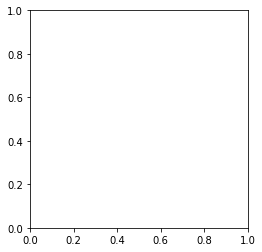

In [242]:
borders.sort_values(by = "nawc15nm", inplace = True)
wales_colours_2010.index = borders.index
borders['Colour'] = wales_colours_2010['Colour']
cmap = ['red', 'yellow', 'green', 'blue', 'orange']
fig = plt.pyplot.figure()
ax = borders.plot(column = 'Colour', )


In [239]:
borders.head()

,objectid,nawc15cd,nawc15nm,st_areasha,st_lengths,geometry
0,1,W09000001,Ynys Mon,7.144563e+08,361473.944699,(POLYGON ((-4.424681958542279 53.4298061785386...
1,2,W09000002,Arfon,4.092166e+08,127928.093754,POLYGON ((-3.995458591951101 53.24522011816303...
2,3,W09000003,Aberconwy,6.042202e+08,208041.506378,POLYGON ((-3.863426591426343 53.34165542623351...
3,4,W09000004,Clwyd West,9.261025e+08,224104.641273,POLYGON ((-3.753167974882459 53.31630971328744...
4,5,W09000005,Vale of Clwyd,2.162100e+08,126187.010091,(POLYGON ((-3.361152196332922 53.3475237940403...


In [129]:
'''
construct series using for loop to contain colour by grabbing it from wales_results, using nawc15nm as key
'''

0       blue
1       blue
2       blue
3       blue
4       blue
5       blue
6       blue
7       blue
8     orange
9     orange
10    orange
11       red
12       red
13       red
14       red
15       red
16       red
17       red
18       red
19       red
20       red
21       red
22       red
23       red
24       red
25       red
26       red
27       red
28       red
29       red
30       red
31       red
32       red
33       red
34       red
35       red
36       red
37     green
38     green
39     green
Name: winner, dtype: object

## Extensions
Now that you have followed this walkthrough to get you going, try any (or all) of the following ideas for yourself:

* Repeat a similar method for the `ge_2015_results.csv` data set on the [GitHub repository](https://github.com/MangoTheCat/rss-2018-hackathon) repository. 

* Repeat a similar process for the Scotland/England data, or for the whole of Great Britain. You will need the relevant geospatial data folders, also on the GitHub repository.

* Repeat a similar method to map predicted results, as found in the _**Modeling Walkthrough**_, so that these can be visually compared to actual results.

* Rewrite this process into functions so it can be reused on any year's or country's data.

* Anything else you can think of, be creative!

**Good Luck**